# 65세 미만 운전자 및 고령 운전자 법규위반별 교통사고 발생률 비교

In [1]:
from matplotlib import pyplot as plt
from google.oauth2 import service_account
from google.cloud import bigquery

In [2]:
credentials = service_account.Credentials.from_service_account_file("./bigquery_key.json")
client = bigquery.Client(
    credentials=credentials,
    project=credentials.project_id
)

In [3]:
plt.rc("font", family="Malgun Gothic")

In [4]:
traffic_accident_type_sql = """
    SELECT
        *
    FROM
        `calcium-channel-428804-c3.traffic_accident.traffic_accident_type_5`
    ORDER BY
        age_group
"""

In [5]:
traffic_accident_type_df = client.query(traffic_accident_type_sql).to_dataframe()
traffic_accident_type_df = traffic_accident_type_df.set_index("age_group")

C:\Users\minni\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [6]:
traffic_accident_type_df.loc["65-"] = traffic_accident_type_df[traffic_accident_type_df.index != 65].sum(axis=0)
traffic_accident_type_df = traffic_accident_type_df.rename(index={65: "65+"})
traffic_accident_type_df = traffic_accident_type_df.loc[["65-", "65+"]]

In [7]:
total = traffic_accident_type_df.sum(axis=1)
traffic_accident_type_df = traffic_accident_type_df.div(total, axis=0) * 100

In [8]:
sorted_columns = traffic_accident_type_df.sum().sort_values(ascending=False).head(8).index
traffic_accident_type_df = traffic_accident_type_df[sorted_columns]
traffic_accident_type_df = traffic_accident_type_df.drop(columns=["기타"])

In [9]:
traffic_accident_type_df

,안전운전의무불이행,신호위반,안전거리미확보,교차로운행방법위반,중앙선침범,보행자보호의무위반,직진우회전진행방해
age_group,,,,,,,
65-,55.602142,12.003374,10.289127,6.203339,3.856587,3.341326,2.98889
65+,54.10344,11.718833,10.745931,6.509289,4.77121,3.470877,3.068925


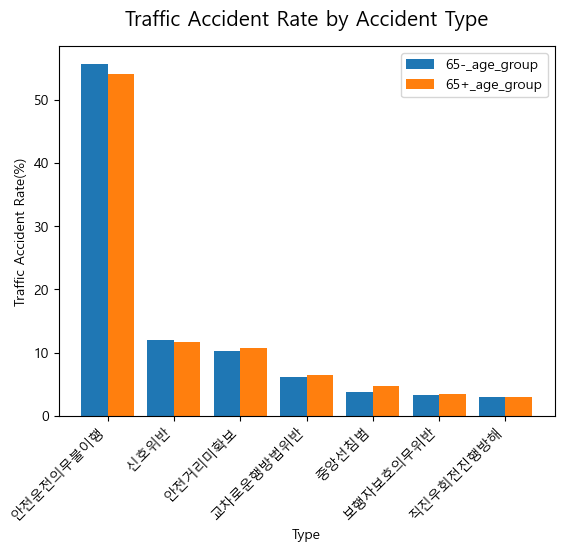

In [10]:
plt.title("Traffic Accident Rate by Accident Type", size=15, pad=15)
plt.xlabel("Type")
plt.ylabel("Traffic Accident Rate(%)")
bar_width = 0.4
bar_positions = range(len(traffic_accident_type_df.columns))
plt.bar([p - bar_width/2 for p in bar_positions], traffic_accident_type_df.loc["65-"], width=bar_width, label="65-_age_group")
plt.bar([p + bar_width/2 for p in bar_positions], traffic_accident_type_df.loc["65+"], width=bar_width, label="65+_age_group")
plt.xticks(bar_positions, traffic_accident_type_df.columns, rotation=45, ha="right")
plt.legend(loc="best")
plt.savefig("traffic_accident_type.png", bbox_inches="tight")